# 演習問題3 確率関数と分布関数、期待値と分散

## (1) 確率関数（確率分布）と分布関数

numpyで解く

In [38]:
from collections import defaultdict, Counter
import itertools
import numpy as np
import pandas as pd

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns; sns.set() # sns.set() ==> グラフの見た目をseabornに合わせる

In [39]:
# https://www.haya-programming.com/entry/2018/03/31/174915
n = 100  # 1回の実験あたりに行う試行回数
N = 1000  # 実験回数

result=[]
for i in range(N):
    X = np.random.choice(range(1,7), size=n, p=[0.1, 0.1, 0.2, 0.3, 0.2, 0.1])
    _, C = np.unique(X, return_counts=True)
    result.append(C)

In [40]:
df = pd.DataFrame(result)
df.columns = range(1,7)
df

,1,2,3,4,5,6
0,6,7,24,34,18,11
1,8,5,18,32,27,10
2,9,9,25,25,24,8
3,13,7,19,34,18,9
4,14,14,18,31,16,7
...,...,...,...,...,...,...
995,17,5,26,21,20,11
996,10,7,14,32,25,12
997,6,10,22,24,28,10
998,11,5,21,30,21,12


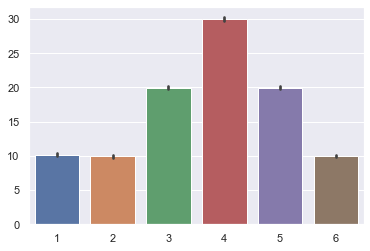

In [41]:
sns.barplot(data=df);

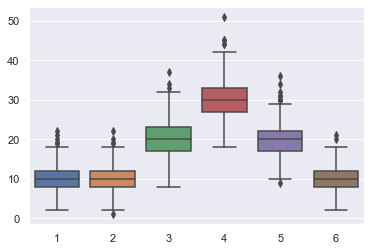

In [42]:
sns.boxplot(data=df);

In [43]:
df_sum = np.cumsum(df, axis=1)
df_sum

,1,2,3,4,5,6
0,6,13,37,71,89,100
1,8,13,31,63,90,100
2,9,18,43,68,92,100
3,13,20,39,73,91,100
4,14,28,46,77,93,100
...,...,...,...,...,...,...
995,17,22,48,69,89,100
996,10,17,31,63,88,100
997,6,16,38,62,90,100
998,11,16,37,67,88,100


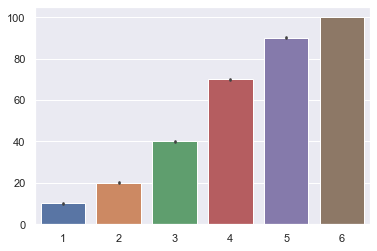

In [44]:
sns.barplot(data=df_sum);

## (2) 期待値と分散

各試行に対して、標本平均と標本分散を算出する。

In [45]:
# https://bellcurve.jp/statistics/course/8614.html

df['xb'] = sum(i*df[i] for i in range(1,7)) / n
df['sig2'] = 1/n * sum(df[i]*(i-df['xb'])**2 for i in range(1,7))
df

,1,2,3,4,5,6,xb,sig2
0,6,7,24,34,18,11,3.84,1.6544
1,8,5,18,32,27,10,3.95,1.7675
2,9,9,25,25,24,8,3.70,1.8900
3,13,7,19,34,18,9,3.64,2.0504
4,14,14,18,31,16,7,3.42,2.1036
...,...,...,...,...,...,...,...,...
995,17,5,26,21,20,11,3.55,2.4275
996,10,7,14,32,25,12,3.91,2.0419
997,6,10,22,24,28,10,3.88,1.8256
998,11,5,21,30,21,12,3.81,2.0539


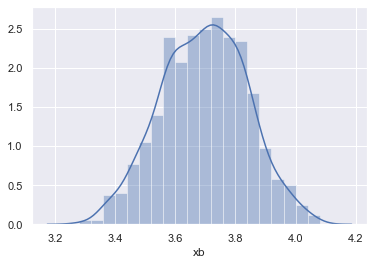

In [46]:
# 標本平均のヒストグラム
sns.distplot(df["xb"])

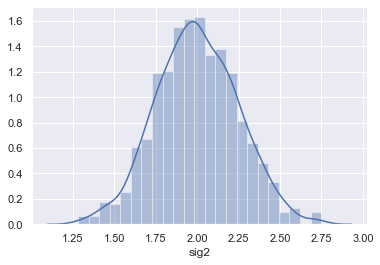

In [47]:
# 標本分散のヒストグラム
sns.distplot(df["sig2"]);